In [1]:
import pandas as pd
import numpy as np

In [6]:
! pip install pandas

In [7]:
! pip install pd


In [9]:
! pip install numpy

In [11]:
! pip install np

# ПОДГОТОВКА ДАННЫХ

In [2]:
df = pd.read_csv('data/car_data.csv')

In [4]:
df.head(3).T

,0,1,2
Model,MarutiWagonR1.0LXI,ToyotaEtiosLiva,MarutiAlto800
Selling Price,312165,313799,295999
Kilometers Driven,82238,30558,22164
Year,2014,2013,2018
Owner,First Owner,First Owner,First Owner
Fuel Type,Petrol + CNG,Petrol,Petrol
Transmission,MANUAL,MANUAL,MANUAL
Insurance,Expired,12-09-2021,01-12-2020
Car Condition,4.2,4.4,4.8


In [5]:
len(df)

2237

In [41]:
# видим, что в наимнованиях колонок есть пробелы
# надо сделать названия консистентными, чтобы было удобно обращаться

In [6]:
df.columns

Index(['Model', 'Selling Price', 'Kilometers Driven', 'Year', 'Owner',
       'Fuel Type', 'Transmission', 'Insurance', 'Car Condition'],
      dtype='object')

In [11]:
df.columns.str.replace(' ', '_').str.lower()

Index(['model', 'selling_price', 'kilometers_driven', 'year', 'owner',
       'fuel_type', 'transmission', 'insurance', 'car_condition'],
      dtype='object')

In [12]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [13]:
type(df.columns)

pandas.core.indexes.base.Index

In [14]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [16]:
df.head(3).T

,0,1,2
model,MarutiWagonR1.0LXI,ToyotaEtiosLiva,MarutiAlto800
selling_price,312165,313799,295999
kilometers_driven,82238,30558,22164
year,2014,2013,2018
owner,First Owner,First Owner,First Owner
fuel_type,Petrol + CNG,Petrol,Petrol
transmission,MANUAL,MANUAL,MANUAL
insurance,Expired,12-09-2021,01-12-2020
car_condition,4.2,4.4,4.8


In [48]:
df.year

0       2014
1       2013
2       2018
3       2013
4       2013
        ... 
2232    2015
2233    2012
2234    2011
2235    2013
2236    2015
Name: year, Length: 2237, dtype: int64

In [49]:
# есть такая проблема с данными, где-то заглавные буквы, где-то нет

In [50]:
df.dtypes # для определения всех колонок с типом строки, нас интересуют объекты

model                 object
selling_price          int64
kilometers_driven      int64
year                   int64
owner                 object
fuel_type             object
transmission          object
insurance             object
car_condition        float64
dtype: object

In [17]:
df.dtypes == object

model                 True
selling_price        False
kilometers_driven    False
year                 False
owner                 True
fuel_type             True
transmission          True
insurance             True
car_condition        False
dtype: bool

In [19]:
list(df.dtypes[df.dtypes==object].index)

['model', 'owner', 'fuel_type', 'transmission', 'insurance']

In [20]:
string_columns = list(df.dtypes[df.dtypes==object].index)

In [21]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [22]:
df.head() # данные теперь имеют более однородные вид

,model,selling_price,kilometers_driven,year,owner,fuel_type,transmission,insurance,car_condition
0,marutiwagonr1.0lxi,312165,82238,2014,first_owner,petrol_+_cng,manual,expired,4.2
1,toyotaetiosliva,313799,30558,2013,first_owner,petrol,manual,12-09-2021,4.4
2,marutialto800,295999,22164,2018,first_owner,petrol,manual,01-12-2020,4.8
3,marutiswift,435199,30535,2013,first_owner,diesel,manual,comp,4.3
4,marutiwagonr1.0,289099,15738,2013,first_owner,petrol,manual,11-08-2021,4.3


# Анализ данных (как выглядят данные?)

In [23]:
df.dtypes

model                 object
selling_price          int64
kilometers_driven      int64
year                   int64
owner                 object
fuel_type             object
transmission          object
insurance             object
car_condition        float64
dtype: object

In [24]:
for col in df.columns: # для каждого столбца выведем некоторую статистику
    print(col)
    print(df[col].head())
    print()

model
0    marutiwagonr1.0lxi
1       toyotaetiosliva
2         marutialto800
3           marutiswift
4       marutiwagonr1.0
Name: model, dtype: object

selling_price
0    312165
1    313799
2    295999
3    435199
4    289099
Name: selling_price, dtype: int64

kilometers_driven
0    82238
1    30558
2    22164
3    30535
4    15738
Name: kilometers_driven, dtype: int64

year
0    2014
1    2013
2    2018
3    2013
4    2013
Name: year, dtype: int64

owner
0    first_owner
1    first_owner
2    first_owner
3    first_owner
4    first_owner
Name: owner, dtype: object

fuel_type
0    petrol_+_cng
1          petrol
2          petrol
3          diesel
4          petrol
Name: fuel_type, dtype: object

transmission
0    manual
1    manual
2    manual
3    manual
4    manual
Name: transmission, dtype: object

insurance
0       expired
1    12-09-2021
2    01-12-2020
3          comp
4    11-08-2021
Name: insurance, dtype: object

car_condition
0    4.2
1    4.4
2    4.8
3    4.3
4    4.3
Name

In [25]:
df.model.unique()

array(['marutiwagonr1.0lxi', 'toyotaetiosliva', 'marutialto800',
       'marutiswift', 'marutiwagonr1.0', 'hyundaielitei20asta1.2',
       'hyundaigrandi10sportz1.2kappa', 'hyundaielitei20asta',
       'maruticelerio', 'marutiswiftdzirevxi1.2bs', 'marutidzire',
       'hondacivic1.8s', 'marutialtok10vxi', 'marutialto800lxi',
       'hyundaivernafluidic1.6ex', 'toyotaetioscross1.4',
       'hondacitysvcvt', 'volkswagenventohighline', 'hyundaii20magnao',
       'volkswagenpologt', 'mahindratuv300', 'hondaamaze1.5vcvt',
       'tatananoxt', 'renaultkwid', 'marutialtok10',
       'hyundaielitei20sportz', 'marutizenestilo', 'maruticeleriozxi',
       'marutiswiftdzirevdibs', 'marutibalenoalpha1.2', 'marutiswiftvdi',
       'tatatiagoxt1.2', 'mahindraboleropower+',
       'hyundaielitei20magna1.4', 'marutisx4', 'marutibalenodelta1.2k12',
       'marutiswiftvxi', 'hondacityvmt', 'mahindraxuv500w8',
       'hyundaivenue1.4crdimt', 'hyundaii20magnao1.4',
       'fordecosport1.5titaniumti', 'hyu

In [28]:
df.model.nunique()

434

In [30]:
for col in df.columns: # для каждого столбца выведем некоторую статистику
    print(col)
    print(df[col].unique()[:5]) 
    print(df[col].nunique()) # количество уникальный значений
    print()

model
['marutiwagonr1.0lxi' 'toyotaetiosliva' 'marutialto800' 'marutiswift'
 'marutiwagonr1.0']
434

selling_price
[312165 313799 295999 435199 289099]
1930

kilometers_driven
[82238 30558 22164 30535 15738]
2221

year
[2014 2013 2018 2015 2012]
15

owner
['first_owner' 'third_owner' 'second_owner']
3

fuel_type
['petrol_+_cng' 'petrol' 'diesel' 'petrol_+_lpg']
4

transmission
['manual' 'mh12' 'ts07' 'automatic' 'up14']
58

insurance
['expired' '12-09-2021' '01-12-2020' 'comp' '11-08-2021']
473

car_condition
[4.2 4.4 4.8 4.3 4.7]
19



In [31]:
df.selling_price

0       312165
1       313799
2       295999
3       435199
4       289099
         ...  
2232    385999
2233    324099
2234    212299
2235    378899
2236    304299
Name: selling_price, Length: 2237, dtype: int64

In [33]:
! pip install seaborn

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

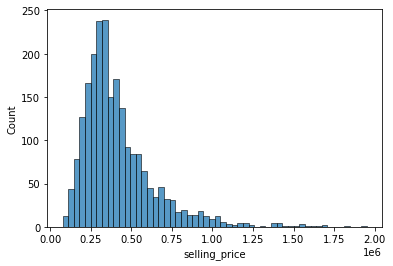

In [37]:
sns.histplot(df.selling_price)

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

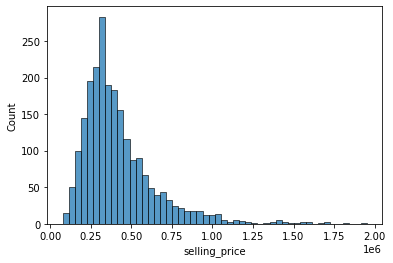

In [38]:
sns.histplot(df.selling_price, bins = 50) #bins-количество столбиков гистограммы
# 1e6 = 1.000.000
# такое распределение называется long tail distribution (распределение с длинным хвостом)

In [39]:
df.max()

model                volkswagenventotrendline
selling_price                         1952397
kilometers_driven                      855881
year                                     2020
owner                             third_owner
fuel_type                        petrol_+_lpg
transmission                             up78
car_condition                             5.0
dtype: object

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

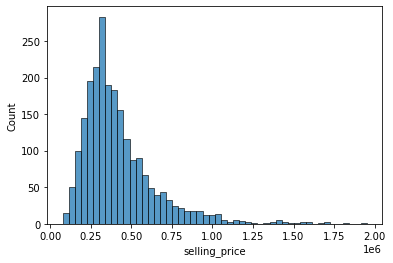

In [40]:
sns.histplot(df[df.selling_price<2000000].selling_price, bins = 50)

In [41]:
df[df.selling_price<2000000].selling_price.mean()

418443.0688421994

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

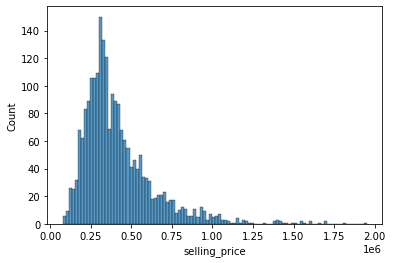

In [42]:
sns.histplot(df[df.selling_price<2000000].selling_price, bins = 100)

In [43]:
# распределение с длинным хвостом часто мешает предсказательной модели

In [44]:
np.log([1, 10, 100, 1000]) # часто применяют логарифмическое преобразование

array([0.        , 2.30258509, 4.60517019, 6.90775528])

In [45]:
np.log([0, 1, 10, 100, 1000])  # возникает проблема с нулём

<ipython-input-45-8bc303c9c586>:1: RuntimeWarning: divide by zero encountered in log
  np.log([0, 1, 10, 100, 1000])  # возникает проблема с нулём


array([      -inf, 0.        , 2.30258509, 4.60517019, 6.90775528])

In [46]:
np.log([0 + 1, 1 + 1, 10 + 1, 100 + 1, 1000 + 1]) # решается добавлением 1

array([0.        , 0.69314718, 2.39789527, 4.61512052, 6.90875478])

In [47]:
np.log1p([0,1,10,100,1000]) # log(x+1) numpy.log1p добавляет + 1

array([0.        , 0.69314718, 2.39789527, 4.61512052, 6.90875478])

In [48]:
price_logs = np.log1p(df.selling_price)

In [49]:
price_logs

0       12.651290
1       12.656511
2       12.598115
3       12.983561
4       12.574528
          ...    
2232    12.863593
2233    12.688807
2234    12.265756
2235    12.845028
2236    12.625769
Name: selling_price, Length: 2237, dtype: float64

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

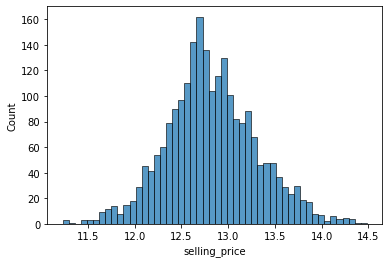

In [50]:
sns.histplot(price_logs,bins=50)#хвост исчез
# расределение является нормальным, что необходимо для правильной работы моделей

# ВАЛИДАЦИЯ МОДЕЛИ 
- разбиваем данный на три части: для обучения модели, для валидации, для тестирования
- X_train, y_train, X_val, y_val, X_test, y_test
- 60%, 20%, 20% - соотношениею между train:val:test

In [52]:
len(df)

2237

In [58]:
len(df) * 0.2

447.40000000000003

In [59]:
int(len(df) * 0.2)

447

In [60]:
n = len(df)
n_train = int(len(df) * 0.6)
n_val = int(len(df) * 0.2)
n_test = int(len(df) * 0.2)

In [61]:
n_train + n_val + n_test == n

False

In [62]:
n_train + n_val + n_test, n

(2236, 2237)

In [63]:
n = len(df)
n_train = int(len(df) * 0.6)
n_val = int(len(df) * 0.2)
n_test = n - n_val - n_train

In [64]:
n_train + n_val + n_test == n

True

In [65]:
df.iloc[1] # можно получить строку

model                toyotaetiosliva
selling_price                 313799
kilometers_driven              30558
year                            2013
owner                    first_owner
fuel_type                     petrol
transmission                  manual
insurance                 12-09-2021
car_condition                    4.4
Name: 1, dtype: object

In [66]:
df.head()

,model,selling_price,kilometers_driven,year,owner,fuel_type,transmission,insurance,car_condition
0,marutiwagonr1.0lxi,312165,82238,2014,first_owner,petrol_+_cng,manual,expired,4.2
1,toyotaetiosliva,313799,30558,2013,first_owner,petrol,manual,12-09-2021,4.4
2,marutialto800,295999,22164,2018,first_owner,petrol,manual,01-12-2020,4.8
3,marutiswift,435199,30535,2013,first_owner,diesel,manual,comp,4.3
4,marutiwagonr1.0,289099,15738,2013,first_owner,petrol,manual,11-08-2021,4.3


In [91]:
df.iloc[[0,1,2]] # можно получить несколько строк

,model,selling_price,kilometers_driven,year,owner,fuel_type,transmission,insurance,car_condition
0,marutiwagonr1.0lxi,312165,82238,2014,first_owner,petrol_+_cng,manual,expired,4.2
1,toyotaetiosliva,313799,30558,2013,first_owner,petrol,manual,12-09-2021,4.4
2,marutialto800,295999,22164,2018,first_owner,petrol,manual,01-12-2020,4.8


In [92]:
df.iloc[:10] # первые 10 записей

,model,selling_price,kilometers_driven,year,owner,fuel_type,transmission,insurance,car_condition
0,marutiwagonr1.0lxi,312165,82238,2014,first_owner,petrol_+_cng,manual,expired,4.2
1,toyotaetiosliva,313799,30558,2013,first_owner,petrol,manual,12-09-2021,4.4
2,marutialto800,295999,22164,2018,first_owner,petrol,manual,01-12-2020,4.8
3,marutiswift,435199,30535,2013,first_owner,diesel,manual,comp,4.3
4,marutiwagonr1.0,289099,15738,2013,first_owner,petrol,manual,11-08-2021,4.3
5,hyundaielitei20asta1.2,708199,32652,2018,first_owner,petrol,mh12,comp,4.7
6,hyundaigrandi10sportz1.2kappa,410788,32496,2013,first_owner,petrol,manual,expired,4.4
7,hyundaielitei20asta,606599,27487,2015,first_owner,petrol,manual,22-03-2021,4.6
8,maruticelerio,459199,41383,2018,first_owner,petrol,manual,06-03-2021,4.4
9,marutiwagonr1.0,265899,65476,2012,first_owner,petrol_+_cng,manual,23-10-2021,4.3


In [93]:
df.iloc[len(df)-10:] # последние 10

,model,selling_price,kilometers_driven,year,owner,fuel_type,transmission,insurance,car_condition
2227,toyotacorollaaltis,241899,83273,2009,second_owner,petrol_+_cng,manual,expired,4.2
2228,maruticiazdelta1.5shvs,819210,38480,2018,first_owner,petrol,rj45,expired,4.5
2229,hyundaicreta1.6sx(o),1031199,50518,2015,first_owner,diesel,ka04,NaN,4.4
2230,marutiignisdelta1.2,472499,9550,2017,first_owner,petrol,manual,26-04-2021,4.8
2231,marutivitarabrezzavdi,590999,68638,2016,first_owner,diesel,manual,09-05-2021,4.4
2232,marutiwagonr1.0,385999,45263,2015,second_owner,petrol,manual,10-06-2021,4.4
2233,marutiswift,324099,100335,2012,second_owner,petrol,manual,02-08-2021,4.3
2234,hyundaieond,212299,28016,2011,first_owner,petrol,manual,expired,3.2
2235,fordecosport1.5ambiente,378899,87947,2013,first_owner,diesel,manual,03-09-2021,4.2
2236,marutialtok10,304299,33639,2015,first_owner,petrol,manual,17-10-2021,4.1


In [78]:
df_val = df.iloc[:n_val]

In [79]:
len(df_val)

447

In [80]:
df_val

,model,selling_price,kilometers_driven,year,owner,fuel_type,transmission,insurance,car_condition
0,marutiwagonr1.0lxi,312165,82238,2014,first_owner,petrol_+_cng,manual,expired,4.2
1,toyotaetiosliva,313799,30558,2013,first_owner,petrol,manual,12-09-2021,4.4
2,marutialto800,295999,22164,2018,first_owner,petrol,manual,01-12-2020,4.8
3,marutiswift,435199,30535,2013,first_owner,diesel,manual,comp,4.3
4,marutiwagonr1.0,289099,15738,2013,first_owner,petrol,manual,11-08-2021,4.3
...,...,...,...,...,...,...,...,...,...
442,marutiwagonr1.0,408399,31796,2015,first_owner,petrol,manual,23-09-2021,4.3
443,hondacitysmt,398999,75713,2010,second_owner,petrol_+_cng,manual,19-10-2021,4.3
444,hondaamaze1.2smti,552899,14358,2018,first_owner,petrol,manual,expired,4.6
445,hyundaigrandi10magna1.2kappa,480699,10172,2017,first_owner,petrol,manual,15-07-2021,4.8


In [81]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val: n_val+n_test]
df_train = df.iloc[n_val+n_test:] # данные сгруппированы и нам нужно их перемешать

In [82]:
len(df_val), len(df_test), len(df_train)

(447, 448, 1342)

In [83]:
n_val, n_test, n_train

(447, 448, 1342)

In [84]:
idx = np.arange(n) # хотим их перемешать

In [85]:
idx

array([   0,    1,    2, ..., 2234, 2235, 2236])

In [86]:
np.random.seed(2) # чтобы результаты были воспроизводимы
np.random.shuffle(idx)

In [87]:
idx

array([  60, 1266,  794, ...,  674, 1099, 1608])

In [88]:
len(df.iloc[idx[:n_val]])

447

In [89]:
df.iloc[idx[:n_val]]

,model,selling_price,kilometers_driven,year,owner,fuel_type,transmission,insurance,car_condition
60,toyotacorollaaltis,671199,52544,2014,second_owner,petrol,manual,07-08-2021,4.3
1266,hyundaii20sportz1.2,384799,61842,2013,first_owner,petrol,manual,09-08-2021,4.3
794,marutiswift,434299,14864,2015,first_owner,petrol,manual,09-05-2021,4.4
1550,marutialto800,261499,57525,2013,first_owner,petrol,manual,28-03-2021,4.3
810,marutivitarabrezzavdi,575799,62646,2016,first_owner,diesel,manual,14-07-2021,4.5
...,...,...,...,...,...,...,...,...,...
1632,hyundaigrandi10sportz1.2kappa,395599,53063,2016,first_owner,petrol,manual,09-10-2021,4.4
448,hondaamaze1.5emti,409299,123934,2015,second_owner,diesel,manual,31-01-2021,4.3
336,marutiswiftdzirevdibs,352499,46299,2012,first_owner,diesel,manual,18-11-2021,4.2
1823,marutibalenoalpha1.2,772699,23424,2019,first_owner,petrol,manual,21-08-2022,4.9


In [90]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [91]:
df_train.iloc[:10]

,model,selling_price,kilometers_driven,year,owner,fuel_type,transmission,insurance,car_condition
60,toyotacorollaaltis,671199,52544,2014,second_owner,petrol,manual,07-08-2021,4.3
1266,hyundaii20sportz1.2,384799,61842,2013,first_owner,petrol,manual,09-08-2021,4.3
794,marutiswift,434299,14864,2015,first_owner,petrol,manual,09-05-2021,4.4
1550,marutialto800,261499,57525,2013,first_owner,petrol,manual,28-03-2021,4.3
810,marutivitarabrezzavdi,575799,62646,2016,first_owner,diesel,manual,14-07-2021,4.5
1082,skodasuperbelegance1.8tsi,351799,76434,2012,second_owner,petrol,manual,expired,3.9
1413,marutiertiga,408199,83719,2012,first_owner,diesel,manual,30-10-2021,4.3
1943,marutiritz,335999,67560,2010,second_owner,petrol,manual,expired,4.1
1436,marutizenestilo,183399,71023,2008,second_owner,petrol,manual,24-05-2021,4.1
1962,marutiswift,338699,81690,2013,first_owner,petrol,manual,13-05-2021,4.0


In [92]:
len(df_train), len(df_val), len(df_test)

(1342, 447, 448)

In [93]:
df_train # видим оригинальные индексы

,model,selling_price,kilometers_driven,year,owner,fuel_type,transmission,insurance,car_condition
60,toyotacorollaaltis,671199,52544,2014,second_owner,petrol,manual,07-08-2021,4.3
1266,hyundaii20sportz1.2,384799,61842,2013,first_owner,petrol,manual,09-08-2021,4.3
794,marutiswift,434299,14864,2015,first_owner,petrol,manual,09-05-2021,4.4
1550,marutialto800,261499,57525,2013,first_owner,petrol,manual,28-03-2021,4.3
810,marutivitarabrezzavdi,575799,62646,2016,first_owner,diesel,manual,14-07-2021,4.5
...,...,...,...,...,...,...,...,...,...
1657,marutialto,153399,59696,2009,first_owner,petrol,manual,26-02-2021,4.3
931,mahindraxuv500w11,1603499,16286,2018,first_owner,diesel,mh03,zero_dep,4.7
2217,marutialto800,339799,20321,2019,first_owner,petrol,manual,23-04-2022,4.6
518,hyundaielitei20asta1.2,585299,18711,2017,second_owner,petrol,manual,expired,4.5


In [94]:
df_train.reset_index(drop=True)

,model,selling_price,kilometers_driven,year,owner,fuel_type,transmission,insurance,car_condition
0,toyotacorollaaltis,671199,52544,2014,second_owner,petrol,manual,07-08-2021,4.3
1,hyundaii20sportz1.2,384799,61842,2013,first_owner,petrol,manual,09-08-2021,4.3
2,marutiswift,434299,14864,2015,first_owner,petrol,manual,09-05-2021,4.4
3,marutialto800,261499,57525,2013,first_owner,petrol,manual,28-03-2021,4.3
4,marutivitarabrezzavdi,575799,62646,2016,first_owner,diesel,manual,14-07-2021,4.5
...,...,...,...,...,...,...,...,...,...
1337,marutialto,153399,59696,2009,first_owner,petrol,manual,26-02-2021,4.3
1338,mahindraxuv500w11,1603499,16286,2018,first_owner,diesel,mh03,zero_dep,4.7
1339,marutialto800,339799,20321,2019,first_owner,petrol,manual,23-04-2022,4.6
1340,hyundaielitei20asta1.2,585299,18711,2017,second_owner,petrol,manual,expired,4.5


In [95]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train2=df_train.reset_index(drop=True)

In [96]:
df_train2.iloc[:11]

,model,selling_price,kilometers_driven,year,owner,fuel_type,transmission,insurance,car_condition
0,toyotacorollaaltis,671199,52544,2014,second_owner,petrol,manual,07-08-2021,4.3
1,hyundaii20sportz1.2,384799,61842,2013,first_owner,petrol,manual,09-08-2021,4.3
2,marutiswift,434299,14864,2015,first_owner,petrol,manual,09-05-2021,4.4
3,marutialto800,261499,57525,2013,first_owner,petrol,manual,28-03-2021,4.3
4,marutivitarabrezzavdi,575799,62646,2016,first_owner,diesel,manual,14-07-2021,4.5
5,skodasuperbelegance1.8tsi,351799,76434,2012,second_owner,petrol,manual,expired,3.9
6,marutiertiga,408199,83719,2012,first_owner,diesel,manual,30-10-2021,4.3
7,marutiritz,335999,67560,2010,second_owner,petrol,manual,expired,4.1
8,marutizenestilo,183399,71023,2008,second_owner,petrol,manual,24-05-2021,4.1
9,marutiswift,338699,81690,2013,first_owner,petrol,manual,13-05-2021,4.0


In [97]:
np.log1p(df_train.selling_price)

0       13.416822
1       12.860479
2       12.981491
3       12.474190
4       13.263516
          ...    
1337    11.940804
1338    14.287699
1339    12.736112
1340    13.279880
1341    12.503953
Name: selling_price, Length: 1342, dtype: float64

In [98]:
y_train = np.log1p(df_train.selling_price.values)
y_val = np.log1p(df_val.selling_price.values)
y_test = np.log1p(df_test.selling_price.values)
x_train = np.log1p(df_train2.selling_price.values)

In [99]:
del df_train['selling_price'] # чтобы случайно не использовать цену для пресказания цены
del df_val['selling_price']
del df_test['selling_price']

In [100]:
df_train.head(1).T

,0
model,toyotacorollaaltis
kilometers_driven,52544
year,2014
owner,second_owner
fuel_type,petrol
transmission,manual
insurance,07-08-2021
car_condition,4.3


# ЛИНЕЙНАЯ РЕГРЕССИЯ

In [103]:
df_train.iloc[10]

model                marutialto800
kilometers_driven            21745
year                          2017
owner                  first_owner
fuel_type                   petrol
transmission                manual
insurance               18-06-2021
car_condition                  4.7
Name: 10, dtype: object

In [104]:
y_train[10]

12.59710070584057

In [105]:
np.expm1(y_train[10])

295699.00000000023

In [106]:
xi = [21745, 2017, 4.7] # вектор фичей

In [107]:
y_train.mean()

12.813012686356092

In [108]:
def g(xi):
    return np.expm1(y_train.mean())

In [110]:
g(xi) # предсказание цены

366960.6722717362

In [111]:
w0 = 7.17
w = [0.01, 0.04, 0.0002]

In [112]:
def linear_regression(xi):
    pred = w0
    for j in range(len(w)):
        pred += w[j] * xi[j]
    return pred

In [113]:
linear_regression(xi) # получили некоторое предсказание

305.30094

In [114]:
np.expm1(y_train[10])

295699.00000000023

In [115]:
np.expm1(linear_regression(xi))

3.8950547074636845e+132

In [117]:
df.car_condition.max()

5.0

# ВЕКТОРНАЯ ФОРМА 

In [118]:
def dot(xi, w):
    res = 0.0
    for j in range(len(xi)):
        res += xi[j]*w[j]
    return res

In [119]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [120]:
linear_regression(xi)

305.30094

In [121]:
w_new = [w0] + w

In [122]:
w_new

[7.17, 0.01, 0.04, 0.0002]

In [123]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [124]:
linear_regression(xi)

305.30094

In [125]:
x1 = [1, 52544, 2014, 4.3]
x2 = [1, 61842, 2013, 4.3]
x3 = [1, 21745, 2017, 4.7]

X = [x1, x2, x3]
X = np.array(X)

In [126]:
X

array([[1.0000e+00, 5.2544e+04, 2.0140e+03, 4.3000e+00],
       [1.0000e+00, 6.1842e+04, 2.0130e+03, 4.3000e+00],
       [1.0000e+00, 2.1745e+04, 2.0170e+03, 4.7000e+00]])

In [127]:
w_new

[7.17, 0.01, 0.04, 0.0002]

In [130]:
X.dot(w_new) # получаем предсказаия цены

array([613.17086, 706.11086, 305.30094])

In [131]:
def linear_regression(X):
    return X.dot(w_new)

In [132]:
linear_regression(X)

array([613.17086, 706.11086, 305.30094])

# Логиcтическая регрессия


In [133]:
df_train2.iloc[10]

model                marutialto800
selling_price               295699
kilometers_driven            21745
year                          2017
owner                  first_owner
fuel_type                   petrol
transmission                manual
insurance               18-06-2021
car_condition                  4.7
Name: 10, dtype: object

In [134]:
X=df_train2[['kilometers_driven','year','car_condition']]

In [135]:
Y=df_train2[['selling_price']]

In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [140]:
Y_train.iloc[10]

selling_price    528099
Name: 778, dtype: int64

In [141]:
classifier = LogisticRegression(solver='liblinear', C=10.0, random_state=0,max_iter=1000)

In [142]:
import numpy as np
classifier.fit(X_train, np.ravel(Y_train))

LogisticRegression(C=10.0, max_iter=1000, random_state=0, solver='liblinear')

In [143]:
test=classifier.predict(X_test)

In [146]:
test[10]

331599